## Bike Sharing System Data Exploration and Visualization

 by Renato Meira

### Investigation Overview

    Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.
    In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

### Dataset Overview

     This data set includes information about individual rides made in a bike-sharing system covering the greater San 
     Francisco Bay area. Note that this dataset will require some data wrangling in order to make it tidy for analysis.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df_bike = df.copy()
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

df_bike['start_station_id'] = df_bike['start_station_id'].astype('str')
df_bike['end_station_id'] = df_bike['end_station_id'].astype('str')
df_bike['bike_id'] = df_bike['bike_id'].astype('str')

df_bike['user_type'] = df_bike['user_type'].astype('category')
df_bike['member_gender'] = df_bike['member_gender'].astype('category')

df_bike['duration_minute'] = df_bike['duration_sec']/60

df_bike['start_date'] = df_bike.start_time.dt.strftime('%Y-%m-%d')
df_bike['start_hourofday'] = df_bike.start_time.dt.strftime('%H')
df_bike['start_dayofweek'] = df_bike.start_time.dt.strftime('%A')

df_bike['member_age'] = 2019 - df_bike['member_birth_year']

### User Types and Their Weekly Usage

    We can see in the pie chart below that the use of bicycle sharing services is higher for subscribers, totaling 89.2% of users. We can see from the bar chart below that usage is highest on Tuesday and Thursday.

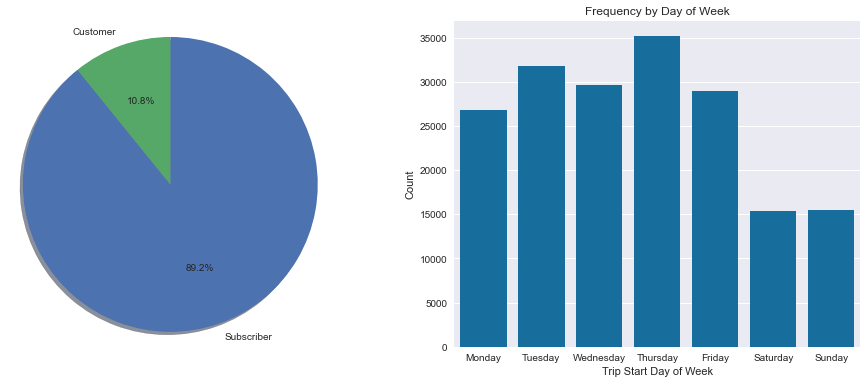

In [4]:
# trip distribution over weekdays
# cast 'start_dayofweek' to category dtype
base_color = sns.color_palette('colorblind')[0]
plt.figure(figsize=[16, 6]);
plt.subplot(1, 2, 1);


sorted_vals = df_bike.user_type.value_counts()/df_bike.shape[0];
plt.pie(sorted_vals, labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');


plt.subplot(1, 2, 2);

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_bike['start_dayofweek'] = df_bike['start_dayofweek'].astype(weekdaycat)

sns.countplot(data=df_bike, x='start_dayofweek', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');
plt.title('Frequency by Day of Week');


### Average Weekday Trip Duration for Customers and Subscribers

   In this chart, we assess the average time between customers and subscribers, and we can see that there is a different behavior between the two groups.
The use of customers is longer and Subscribers travel an average of 10 minutes, showing that the system proposal is for both groups.

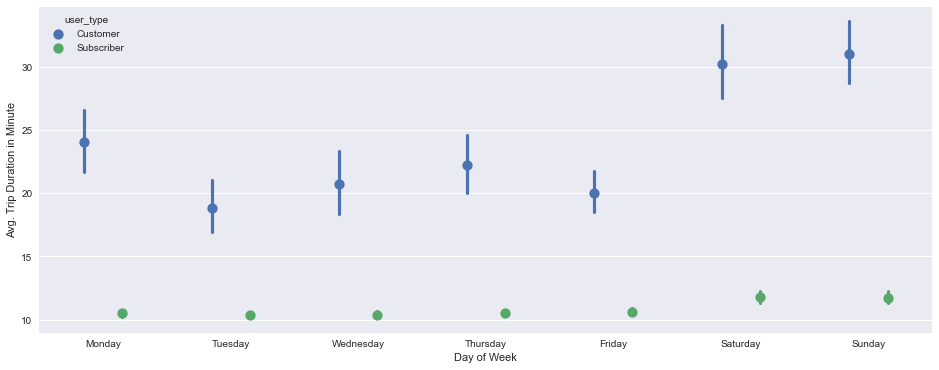

In [5]:
plt.figure(figsize=[16, 6]);
sns.pointplot(data=df_bike, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

### Hourly Usage during Weekdays for Customers and Subscribers

    As shown in the heat map above, we can verify that the behavior between the two groups is totally different, as previously positioned. The proposal of using the complete system is the most acidic use on the weekend for clients and the commuting of the Subscriber, perhaps between work and home.

had one more relevant information:

- generally the time of use of the service is between 7 and 9 am, in both groups.

<Figure size 432x288 with 0 Axes>

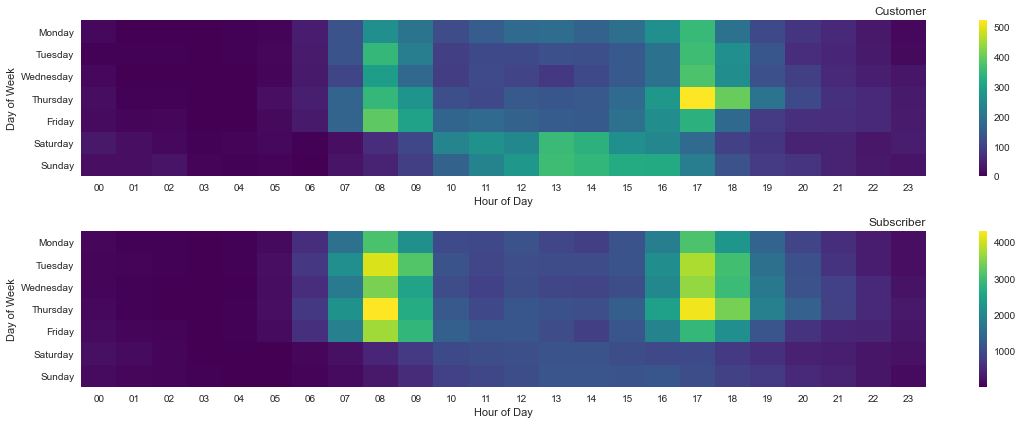

In [6]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')
plt.figure(figsize=[16, 6]);
plt.rcParams['figure.figsize'] = 15, 6;
plt.subplot(2, 1, 1)
customers = df_bike.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sns.heatmap(ct_counts, cmap='viridis');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.subplot(2, 1, 2)
subscribers = df_bike.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sns.heatmap(st_counts, cmap='viridis');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

### Summary

From the exploration, we can ascertain the behavior of using the service for users discriminated as customer and subscriber. We can see from the proposed analysis that customers use the sharing system for entertainment and leisure, as it provides greater use on weekends and average travel time, while the subscriber uses it to get around more often for a week, usually for displacement, example home to work, gym to home, among others.

We were able to conclude that the age that most uses the bike sharing service (Using Confidence Interval) is between 21 and 56 years old.
We can also assess that the days of weeks that are most used are Tuesday and Thursday.
Finally, we can achieve that, the sharing system is efficient for both users who want to move to leisure.


In [ ]:
!jupyter nbconvert Gobike_deck_slide.ipynb --to slides --post serve --no-input --no-prompt